# Computational experiment analysis

**Setup**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Command line used:*

`locust -f locustfile.py -H http://localhost:5000/ -u 1000 -r 1 --headless --csv-full-history --csv run_4  -t 20m -s 300`

**Analysis for the global data (*i.e.*, considering the aggregated data for all API tasks)**

Opening:

In [2]:
df = pd.read_csv('run_4_stats_history.csv')

In [3]:
df

,Timestamp,User Count,Type,Name,Requests/s,Failures/s,50%,66%,75%,80%,...,99.9%,99.99%,100%,Total Request Count,Total Failure Count,Total Median Response Time,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size
0,1696023946,0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0.0000,0.000000,0.0000,0.0000,0.000000
1,1696023947,1,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0.0000,0.000000,0.0000,0.0000,0.000000
2,1696023948,2,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0.0000,0.000000,0.0000,0.0000,0.000000
3,1696023949,4,GET,autocomplete-category,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,2374.4331,2374.433100,2374.4331,2374.4331,48.000000
4,1696023949,4,NaN,Aggregated,0.0,0.0,2400.0,2400.0,2400.0,2400.0,...,2400.0,2400.0,2400.0,1,0,2374.4331,2374.433100,2374.4331,2374.4331,48.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,1696025207,28,NaN,Aggregated,6.5,0.0,92000.0,107000.0,120000.0,128000.0,...,161000.0,161000.0,161000.0,9228,0,17000.0000,35611.268812,2015.3687,282346.6039,845.562527
4878,1696025208,17,GET,autocomplete-category,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3382,0,10000.0000,13742.880428,2112.7319,120981.5547,73.691307
4879,1696025208,17,GET,autocomplete-subcategory,6.6,0.0,99000.0,107000.0,120000.0,128000.0,...,164000.0,164000.0,164000.0,3163,0,65000.0000,70696.743423,2117.2679,282346.6039,160.450522
4880,1696025208,17,GET,query,0.1,0.0,85000.0,85000.0,85000.0,85000.0,...,85000.0,85000.0,85000.0,2694,0,17000.0000,22142.398496,2015.3687,139478.6890,2616.066073


Keeping only data for the steady state:

In [4]:
df = df.query('Name == "Aggregated"')

In [5]:
df.reset_index(inplace=True)

Inspection:

In [6]:
df.shape

(1251, 25)

Visual inspectioning, for excluding excedent data:

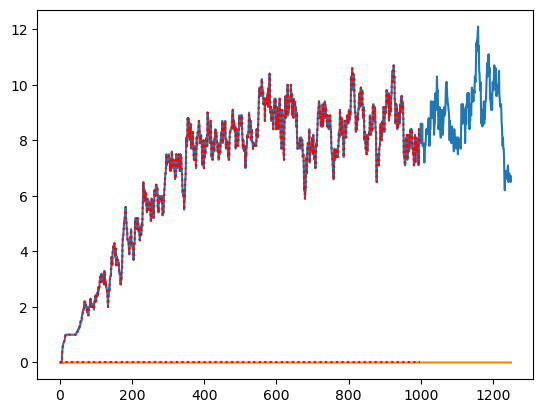

In [7]:
plt.plot(range(df.shape[0]), df['Requests/s'])
plt.plot(range(df.shape[0]), df['Failures/s'])

a, b = 0, 1000

plt.plot(range(a,b), df['Requests/s'].iloc[a:b], c='red', ls='dotted')
plt.plot(range(a,b), df['Failures/s'].iloc[a:b], c='red', ls='dotted')

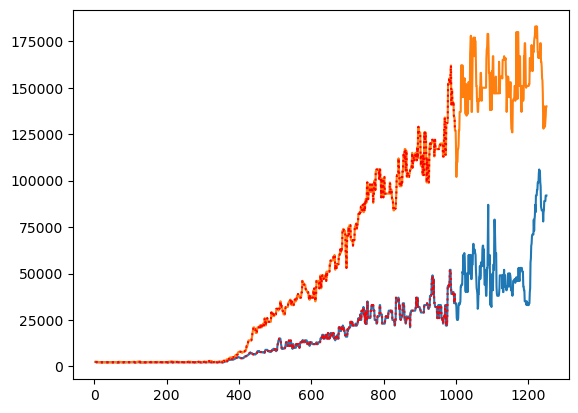

In [10]:
plt.plot(df['50%'])
plt.plot(df['90%'])

plt.plot(range(a,b), df['50%'].iloc[a:b], c='red', ls='dotted')
plt.plot(range(a,b), df['90%'].iloc[a:b], c='red', ls='dotted')

In [11]:
df = df.iloc[a:b]

Requests per second & Failures per second in response to Number of Users:

In [12]:
df.columns

Index(['index', 'Timestamp', 'User Count', 'Type', 'Name', 'Requests/s',
       'Failures/s', '50%', '66%', '75%', '80%', '90%', '95%', '98%', '99%',
       '99.9%', '99.99%', '100%', 'Total Request Count', 'Total Failure Count',
       'Total Median Response Time', 'Total Average Response Time',
       'Total Min Response Time', 'Total Max Response Time',
       'Total Average Content Size'],
      dtype='object')

RPS = 8.5


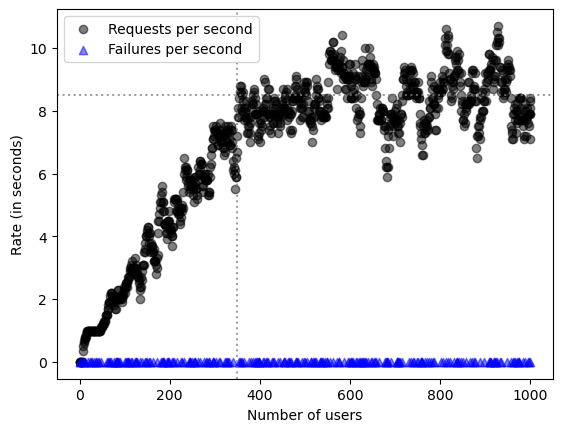

In [56]:
plt.scatter(df['User Count'], df['Requests/s'], 
            c='black', alpha=0.5, label='Requests per second')
plt.scatter(df['User Count'].sample(250), df['Failures/s'].sample(250), marker='^',
         c='blue', alpha=0.5, label='Failures per second')

rps = df['Requests/s'][int(df.shape[0]*0.5):].median()
print(f'RPS = {rps}')

plt.axvline(350, c='gray', ls='dotted', alpha=0.75)
plt.axhline(rps, c='gray', ls='dotted', alpha=0.75)
plt.xlabel('Number of users')
plt.ylabel('Rate (in seconds)')
plt.legend();

Visual inspection for the estimation of the threshold for user population size:

In [49]:
# visual inspection to help to estimate the threshold for user population size.
# plt.plot(df['90%'][:500])
# conslusion: ~350

Response time in response to number of users:

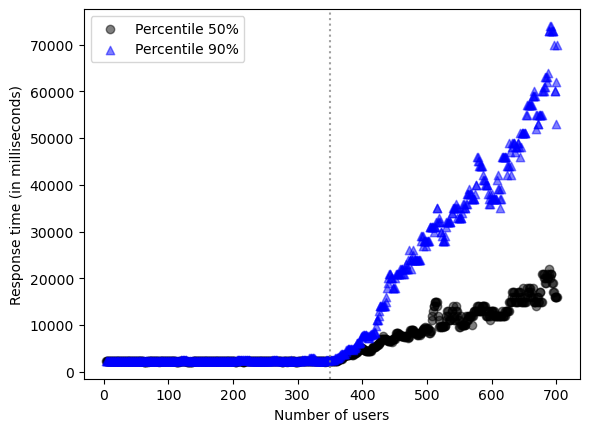

In [52]:
## TENTAR NÃO COLOCAR ESTA NO PAPER (TENTAR ENFOCAR NO RPS) ##

plt.scatter(df['User Count'][:700], df['50%'][:700], c='black', alpha=0.5, label='Percentile 50%')
plt.scatter(df['User Count'][:700], df['90%'][:700], marker='^', c='blue', alpha=0.5, label='Percentile 90%')

# plt.ylim((0, 21000))

plt.axvline(350, c='gray', ls='dotted', alpha=0.75)
plt.xlabel('Number of users')
plt.ylabel('Response time (in milliseconds)')
plt.legend()

Response time as a function of requests per second (RPS):

*i) percentile 50th:*

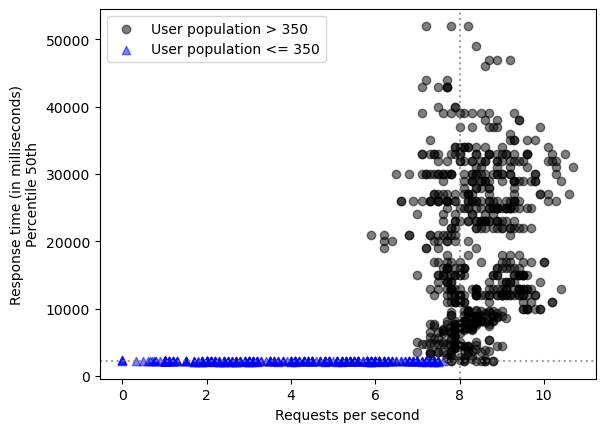

In [54]:
size_limit = 350

plt.scatter(df.iloc[size_limit:]['Requests/s'], df.iloc[size_limit:]['50%'], 
            c='black', alpha=0.5, label=f'User population > {size_limit}')
plt.scatter(df.iloc[:size_limit]['Requests/s'], df.iloc[:size_limit]['50%'], marker='^', 
            c='blue', alpha=0.5, label=f'User population <= {size_limit}')

# plt.ylim((0, 21000))

plt.axvline(8, c='gray', ls='dotted', alpha=0.75)
plt.axhline(df.iloc[:size_limit]['50%'].median(), c='gray', ls='dotted', alpha=0.75)

plt.xlabel('Requests per second')
plt.ylabel('Response time (in milliseconds)\nPercentile 50th')
plt.legend()

*ii) percentile 90th:*

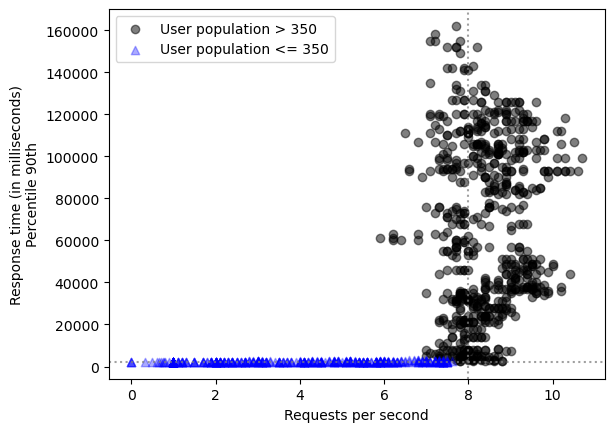

In [55]:
size_limit = 350

plt.scatter(df.iloc[size_limit:]['Requests/s'], df.iloc[size_limit:]['90%'], 
            c='black', alpha=0.5, label=f'User population > {size_limit}')
plt.scatter(df.iloc[:size_limit]['Requests/s'], df.iloc[:size_limit]['90%'], marker='^', 
            c='blue', alpha=0.33, label=f'User population <= {size_limit}')

# plt.ylim((0, 60000))

plt.axvline(8, c='gray', ls='dotted', alpha=0.75)
plt.axhline(df.iloc[:size_limit]['90%'].median(), c='gray', ls='dotted', alpha=0.75)

plt.xlabel('Requests per second')
plt.ylabel('Response time (in milliseconds)\nPercentile 90th')
plt.legend()